In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from wrf import getvar, interplevel, to_np, get_basemap, ll_to_xy,latlon_coords,latlon_coords, smooth2d,get_cartopy, cartopy_xlim, cartopy_ylim, vertcross,CoordPair
import pandas as pd
from netCDF4 import Dataset
import netCDF4
import h5py as h5
import csv
from scipy import stats
import matplotlib as mpl
import glob
import pyproj
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
import seaborn as sns
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
import xarray as xr
from metpy.io import Level2File
from functions_calc import geo_idx

In [3]:
import pandas as pd
data = pd.read_csv("seedingaircraft.csv")
latitude = data['Latitude'].tolist()
longitude = data['Longitude'].tolist()
time = data['Time'].tolist()
altitude = data['Altitude_m'].tolist()

In [4]:
print(altitude[9320])

4289


In [5]:
altct = 0
#ct to start the seeding aircraft plotting
time_ct = 0
#ct to know which index to grab the start or end time of a specific position in the aircraft
ncfile = Dataset('ncf_20170108_022049.nc')
rlat = ncfile['lat0'][:]
rlon = ncfile['lon0'][:]
seeding_ct = 0

#Seeding craft needs a seperate index starter because it starts later
seed_craft_ct = 0
import cartopy.io.img_tiles as cimgt
request = cimgt.StamenTerrain() 
crg = request.crs
z = 0
u = 0
import cartopy.io.img_tiles as cimgt
request = cimgt.StamenTerrain() 
crg = request.crs
while z < 1001:
    while u < 1001:
        new = crg.transform_point(rlon[z,u], rlat[z,u], crs.Geodetic())
        rlon[z,u] = new[0]
        rlat[z,u] = new[1]
        u = u + 1
    z = z + 1
    u = 0

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  del sys.path[0]
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.


In [120]:
ncfile = Dataset('ncf_20170108_051048.nc')
rZ = ncfile['DBZH'][:].squeeze()
height = ncfile['z0'][:].squeeze()
ncfile.close()
#14

In [121]:
f = Dataset("20170108c1.nc")
ptime = f.variables['TIME'][:]
plons = f.variables['glon'][:]
plats = f.variables['glat'][:]

In [131]:
z = 18
print(height[z])

4.6


In [125]:
p = 10400

p_list = [180,165,150,135,120,105,90,75,60,45,30,15]

print(ptime[p])
print(plons[p])
print(plats[p])

pla = plats[p]
plo = plons[p]
new = crg.transform_point(plo, pla, crs.Geodetic())
plo = new[0]
pla = new[1]

45925.0
-116.10132
44.207863


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  


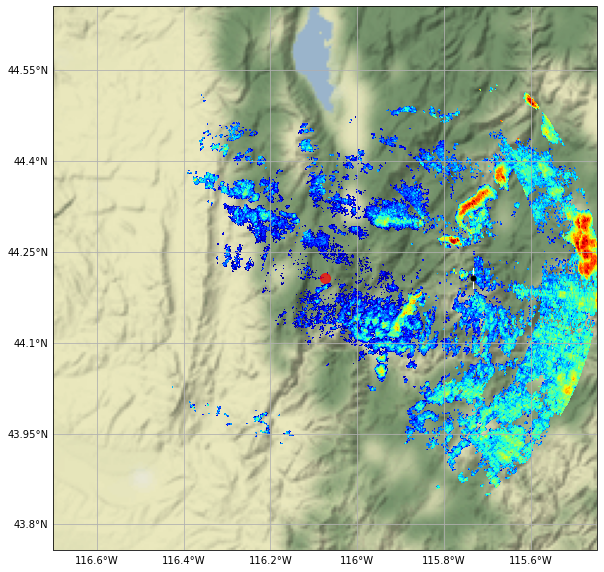

In [102]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

request = cimgt.StamenTerrain()   # very responsive
crg = request.crs   #crs of the projection
fig, ax = make_map(projection = crg)

# specify map extent here
lonmin, lonmax = -116.70062, -115.44735
latmin, latmax = 43.756786, 44.655064

LL = crg.transform_point(lonmin, latmin, ccrs.Geodetic())
UR = crg.transform_point(lonmax, latmax, ccrs.Geodetic())
EW = UR[0] - LL[0]
SN = UR[1] - LL[1]
side = max(EW,SN)
mid_x, mid_y = LL[0]+EW/2.0, LL[1]+SN/2.0  #center location

extent = [mid_x-side/2.0, mid_x+side/2.0, mid_y-side/2.0, mid_y+side/2.0]   # map coordinates, meters

#Specificy the range of dBz
levs = np.arange(1,30,1)
ax.set_extent(extent, crs=crg)
ax.add_image(request, 8)
# add a marker at center of the map
plt.plot(mid_x, mid_y, marker='o', \
         color='red', markersize=10, \
        alpha=0.7, transform = crg)
plt.plot(plo, pla, marker='|', \
         color='white', markersize=20, \
        alpha=1, linewidth = 50, transform = crg)
plt.plot(plo, pla, marker='o', \
         color='black', markersize=5, \
        alpha=1, linewidth = 50, transform = crg)
levs = np.arange(1,30,1)
cont2 = ax.contourf(rlon, rlat, rZ[z,:,:],levs, cmap = "jet")
plt.savefig("540_3_6.png")

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/cheyenne/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  


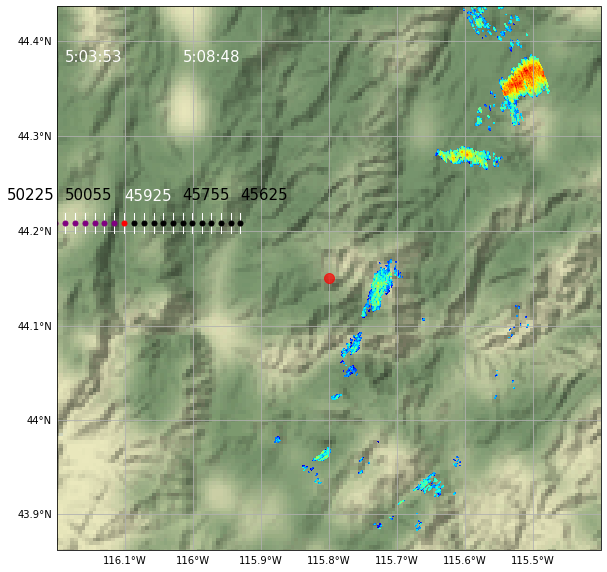

In [132]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

request = cimgt.StamenTerrain()   # very responsive
crg = request.crs   #crs of the projection
fig, ax = make_map(projection = crg)

# specify map extent here
lonmin, lonmax = -116.2, -115.4
latmin, latmax = 44, 44.3

LL = crg.transform_point(lonmin, latmin, ccrs.Geodetic())
UR = crg.transform_point(lonmax, latmax, ccrs.Geodetic())
EW = UR[0] - LL[0]
SN = UR[1] - LL[1]
side = max(EW,SN)
mid_x, mid_y = LL[0]+EW/2.0, LL[1]+SN/2.0  #center location

extent = [mid_x-side/2.0, mid_x+side/2.0, mid_y-side/2.0, mid_y+side/2.0]   # map coordinates, meters

#Specificy the range of dBz
levs = np.arange(1,30,1)
ax.set_extent(extent, crs=crg)
ax.add_image(request, 8)
# add a marker at center of the map

plt.plot(mid_x, mid_y, marker='o', \
         color='red', markersize=10, \
        alpha=0.7, transform = crg)

pla = plats[p]
plo = plons[p]
new = crg.transform_point(plo, pla, crs.Geodetic())
plo = new[0]
pla = new[1]

plt.plot(plo, pla, marker='|', \
         color='white', markersize=20, \
        alpha=1, linewidth = 50, transform = crg)

plt.plot(plo, pla, marker='o', \
         color='red', markersize=5, \
        alpha=1, linewidth = 50, transform = crg)

pla = plats[p]+.025
plo = plons[p]
new = crg.transform_point(plo, pla, crs.Geodetic())
plo = new[0]
pla = new[1]
text = str(ptime[p])[0:5]
plt.text(plo,pla, text, fontsize = 15, color = "white")

for ct in p_list:
    if str(ct) == "180":
        n = p
        n = n - ct
        pla = plats[n]+.025
        plo = plons[n]
        new = crg.transform_point(plo, pla, crs.Geodetic())
        plo = new[0]
        pla = new[1]
        text = str(ptime[n])[0:5]
        plt.text(plo,pla, text, fontsize = 15, color = "black")
    if str(ct) == "180":
        n = p
        n = n + ct
        pla = plats[n]+.025
        plo = plons[n]
        new = crg.transform_point(plo, pla, crs.Geodetic())
        plo = new[0]
        pla = new[1]
        text = str(ptime[n])[0:5]
        plt.text(plo,pla, text, fontsize = 15, color = "black")
    if str(ct) == "90":
        n = p
        n = n - ct
        pla = plats[n]+.025
        plo = plons[n]
        new = crg.transform_point(plo, pla, crs.Geodetic())
        plo = new[0]
        pla = new[1]
        text = str(ptime[n])[0:5]
        plt.text(plo,pla, text, fontsize = 15, color ="black")
        pla = plats[n]+.17
        plo = plons[n]
        new = crg.transform_point(plo, pla, crs.Geodetic())
        plo = new[0]
        pla = new[1]
        plt.text(plo,pla, "5:08:48", fontsize = 15, color = "white")
    if str(ct) == "90":
        n = p
        n = n + ct
        pla = plats[n]+.025
        plo = plons[n]
        new = crg.transform_point(plo, pla, crs.Geodetic())
        plo = new[0]
        pla = new[1]
        text = str(ptime[n])[0:5]
        plt.text(plo,pla, text, fontsize = 15, color = "black")
        pla = plats[n]+.17
        plo = plons[n]
        new = crg.transform_point(plo, pla, crs.Geodetic())
        plo = new[0]
        pla = new[1]
        plt.text(plo,pla, "5:03:53", fontsize = 15, color = "white")
        
        
        
    
    n = p
    n = n - ct
    pla = plats[n]
    plo = plons[n]
    new = crg.transform_point(plo, pla, crs.Geodetic())
    plo = new[0]
    pla = new[1]
    plt.plot(plo, pla, marker='|', \
             color='white', markersize=20, \
            alpha=1, linewidth = 50, transform = crg)
    plt.plot(plo, pla, marker='o', \
             color='black', markersize=5, \
            alpha=1, linewidth = 50, transform = crg)
    
    n = p
    n = n + ct
    pla = plats[n]
    plo = plons[n]
    new = crg.transform_point(plo, pla, crs.Geodetic())
    plo = new[0]
    pla = new[1]
    plt.plot(plo, pla, marker='|', \
             color='white', markersize=20, \
            alpha=1, linewidth = 50, transform = crg)
    plt.plot(plo, pla, marker='o', \
             color='purple', markersize=5, \
            alpha=1, linewidth = 50, transform = crg)
levs = np.arange(1,30,1)
cont2 = ax.contourf(rlon, rlat, rZ[z,:,:],levs, cmap = "jet")
plt.savefig("510Z_4_6km.png")

#440: 4:33:54 -> 4:38:48
#450: 4:43:53 -> 4:48:58
#520 5:13:54 -> 5:18:48